In [4]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('Agg')  # Ensuring that matplotlib uses a non-interactive backend
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Switch backend if needed

# Ensure inline plotting is enabled
%matplotlib inline

# Set aesthetics for seaborn
sns.set(style='whitegrid', palette='muted', color_codes=True)

# Display version of libraries (optional)
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'matplotlib version: {matplotlib.__version__}')

pandas version: 2.2.2
numpy version: 2.0.2
seaborn version: 0.13.2
matplotlib version: 3.10.0


In [5]:
# Load the MyAnimeList dataset
df = pd.read_csv('/kaggle/input/myanimelist-2025/mal_anime.csv', encoding='utf-8')

# Display basic information about the dataframe
print('Shape of the dataset:', df.shape)
print('Columns in the dataset:', df.columns.tolist())

# Display first 5 rows for a quick preview
df.head()

Shape of the dataset: (19931, 25)
Columns in the dataset: ['myanimelist_id', 'title', 'description', 'image', 'Type', 'Episodes', 'Status', 'Premiered', 'Released_Season', 'Released_Year', 'Source', 'Genres', 'Themes', 'Studios', 'Producers', 'Demographic', 'Duration', 'Rating', 'Score', 'Ranked', 'Popularity', 'Members', 'Favorites', 'characters', 'source_url']


,myanimelist_id,title,description,image,Type,Episodes,Status,Premiered,Released_Season,Released_Year,...,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,characters,source_url
0,1,Cowboy Bebop,"Crime is timeless. By the year 2071, humanity ...",https://cdn.myanimelist.net/images/anime/4/196...,TV,26,Finished Airing,Spring 1998,Spring,1998.0,...,NaN,24 min. per ep.,R - 17+ (violence & profanity),8.75,#48,#42,"2,008,019","87,916","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...",https://cdn.myanimelist.net/images/anime/1439/...,Movie,1.0,Finished Airing,NaN,NaN,NaN,...,NaN,1 hr. 55 min.,R - 17+ (violence & profanity),8.38,#232,#649,"403,604","1,748","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",https://cdn.myanimelist.net/images/anime/1130/...,TV,26,Finished Airing,Spring 1998,Spring,1998.0,...,Shounen,24 min. per ep.,PG-13 - Teens 13 or older,8.22,#385,#265,"815,140","17,193","[{""id"": 713, ""name"": ""Stryfe, Meryl"", ""url"": ""...",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"Though hidden away from the general public, Wi...",https://cdn.myanimelist.net/images/anime/10/19...,TV,26.0,Finished Airing,Summer 2002,Summer,2002.0,...,NaN,25 min. per ep.,PG-13 - Teens 13 or older,7.23,#3344,#1979,"125,868",686,"[{""id"": 300, ""name"": ""Amon"", ""url"": ""https://m...",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,https://cdn.myanimelist.net/images/anime/7/215...,TV,52,Finished Airing,Fall 2004,Fall,2004.0,...,Shounen,23 min. per ep.,PG - Children,6.92,#4887,#5765,"16,456",18,"[{""id"": 9054, ""name"": ""Beet"", ""url"": ""https://...",https://myanimelist.net/anime/8/Bouken_Ou_Beet


In [6]:
# Let's take a closer look at the 'Episodes' and 'Premiered' columns
print('Unique values in Episodes column sample:', df['Episodes'].dropna().unique()[:10])
print('Unique values in Premiered column sample:', df['Premiered'].dropna().unique()[:10])

# Cleaning Episodes column: Attempt to convert to numeric; set non-numeric values to NaN
df['Episodes_clean'] = pd.to_numeric(df['Episodes'], errors='coerce')

# Handle any remaining missing values in Episodes_clean (if needed, you could fill with median or drop rows)
episodes_missing = df['Episodes_clean'].isnull().sum()
print('Missing numeric Episodes after conversion:', episodes_missing)

# Infer and parse date-like information from the 'Premiered' column if possible, example: 'Spring 2020'
# Here, we create a new column that extracts the year if present; this is a simple heuristic
def extract_year(premiered_str):
    try:
        # Attempt to extract a year from the string
        return int(premiered_str[-4:])
    except:
        return np.nan

df['Premiered_Year'] = df['Premiered'].dropna().apply(extract_year)
df['Premiered_Year'] = df['Premiered_Year'].combine_first(df['Released_Year'])

# Convert other potentially numeric columns that are read as strings
for col in ['Popularity', 'Members', 'Favorites']:
    df[col+'_num'] = pd.to_numeric(df[col], errors='coerce')

# Show a summary of the cleaned columns
print(df[['Episodes', 'Episodes_clean', 'Premiered', 'Premiered_Year', 'Popularity_num', 'Members_num', 'Favorites_num']].head())

# Sometimes others working with this data see errors converting mixed-type columns; using pd.to_numeric with errors='coerce' is a robust solution.

Unique values in Episodes column sample: ['26' '1.0' '26.0' '52' '145' '24' '52.0' '74' '220' 'Unknown']
Unique values in Premiered column sample: ['Spring 1998' 'Summer 2002' 'Fall 2004' 'Spring 2005' 'Fall 2002'
 'Spring 2004' 'Fall 1999' 'Spring 2003' 'Fall 1995' 'Fall 1997']
Missing numeric Episodes after conversion: 1059
  Episodes  Episodes_clean    Premiered  Premiered_Year  Popularity_num  \
0       26            26.0  Spring 1998          1998.0             NaN   
1      1.0             1.0          NaN             NaN             NaN   
2       26            26.0  Spring 1998          1998.0             NaN   
3     26.0            26.0  Summer 2002          2002.0             NaN   
4       52            52.0    Fall 2004          2004.0             NaN   

   Members_num  Favorites_num  
0          NaN            NaN  
1          NaN            NaN  
2          NaN            NaN  
3          NaN          686.0  
4          NaN           18.0  


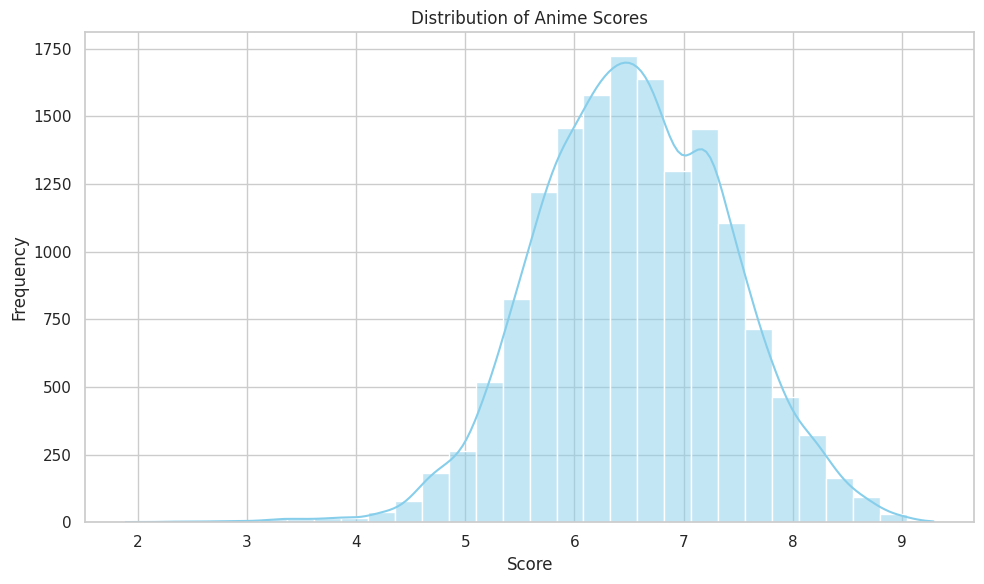

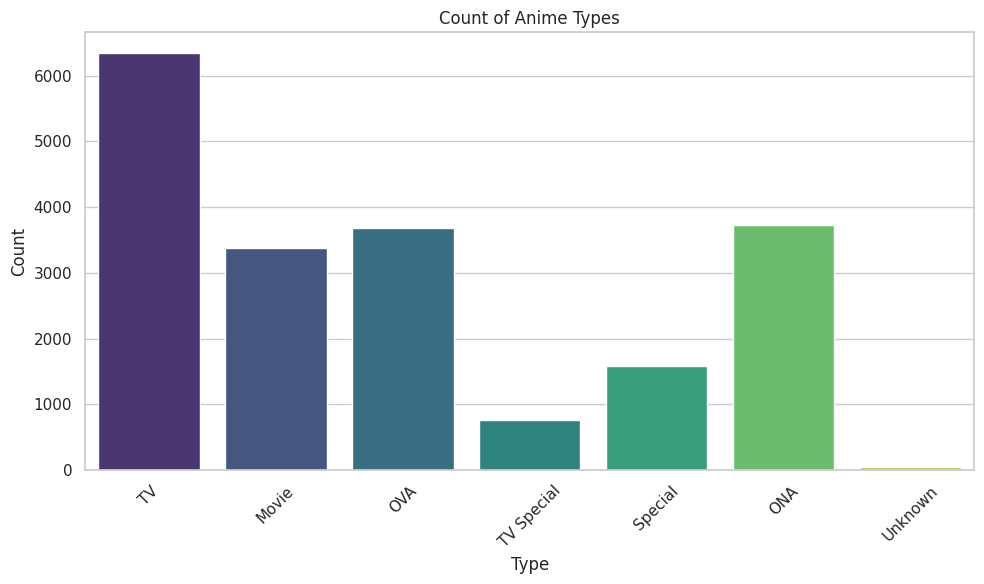

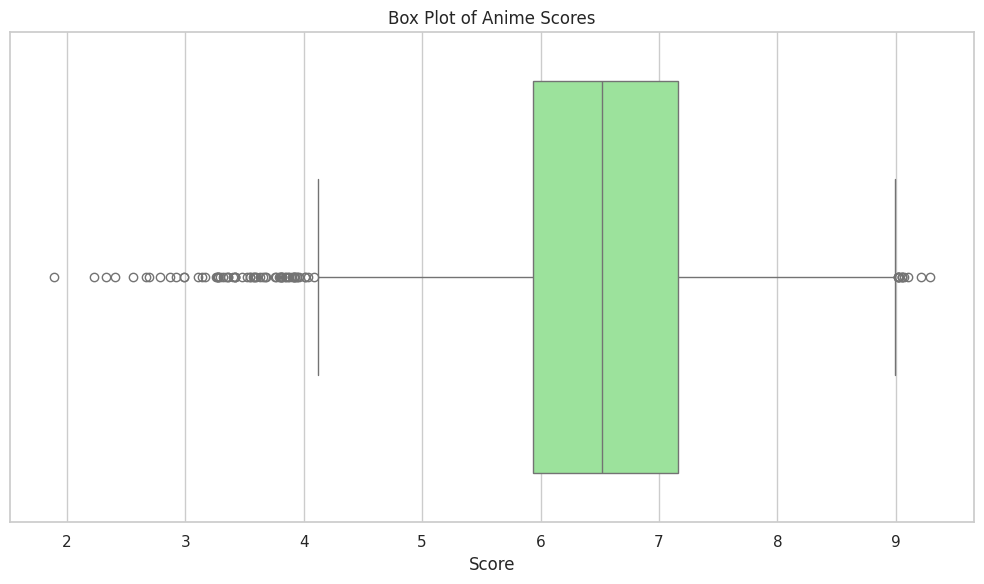

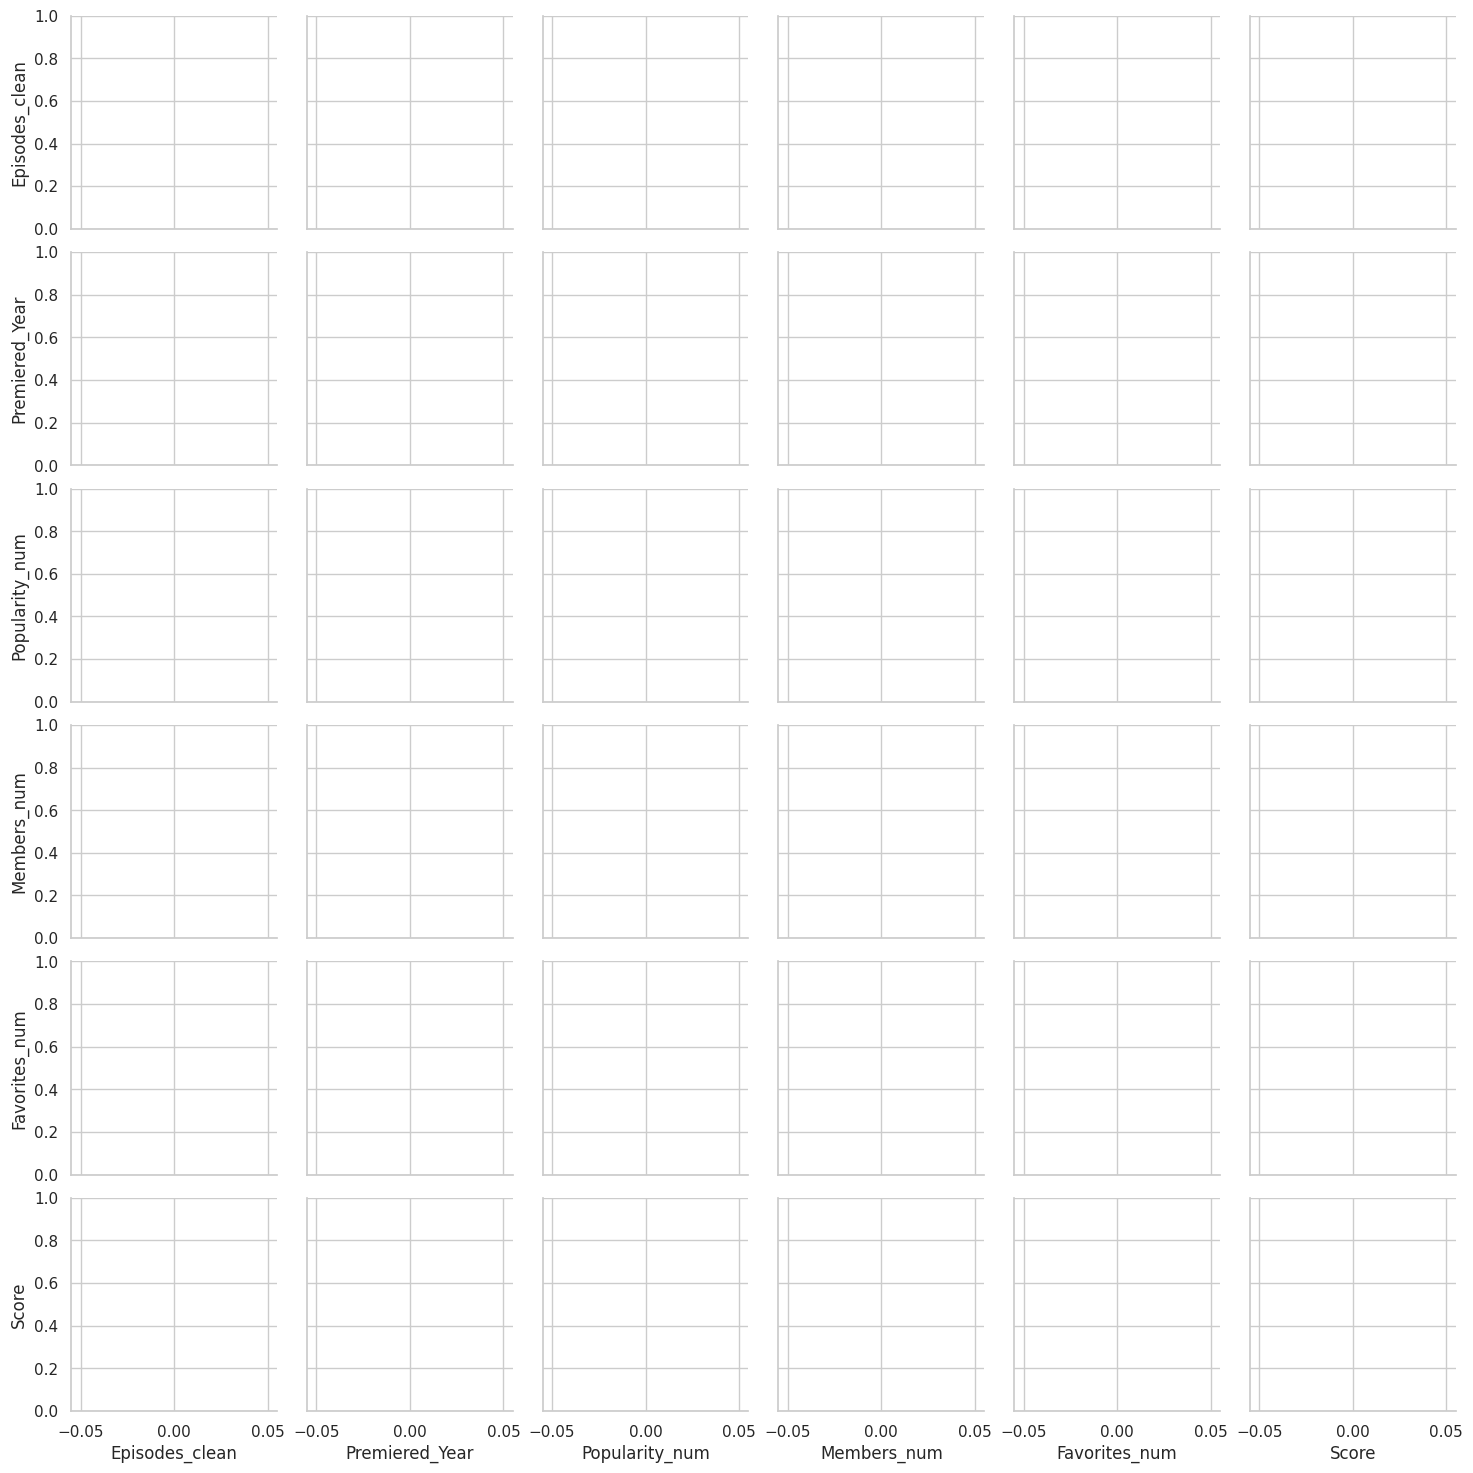

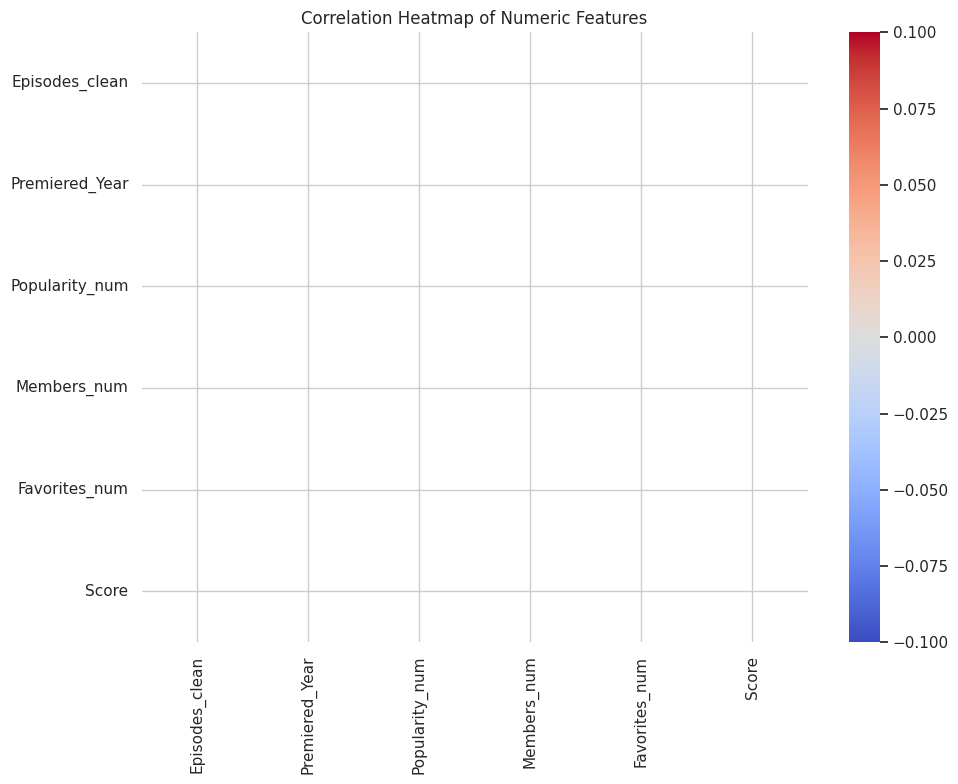

In [8]:
# Distribution of Score using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Count plot for 'Type' column (Pie Chart style is typically done with plt.pie but here we use countplot for a bar visualization)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type', palette='viridis')
plt.title('Count of Anime Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box plot for the Score to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Score'], color='lightgreen')
plt.title('Box Plot of Anime Scores')
plt.xlabel('Score')
plt.tight_layout()
plt.show()

# Pair Plot: Using numeric columns only (if four or more, but here we have less so we can include a pair plot among a few columns)
numeric_df = df[['Episodes_clean', 'Premiered_Year', 'Popularity_num', 'Members_num', 'Favorites_num', 'Score']].dropna()
if numeric_df.shape[1] >= 2:
    sns.pairplot(numeric_df)
    plt.show()
else:
    print('Not enough numeric columns for a pair plot.')

# Optional: Heatmap for correlation if there are 4 or more numeric columns
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

Mean Squared Error: 0.620088928299121
R2 Score: 0.01629188755660138


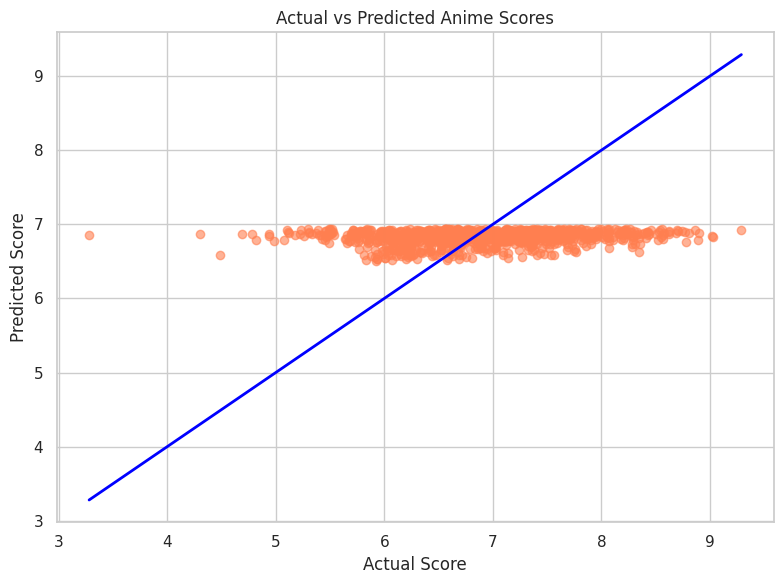

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features for prediction
# We use Episodes_clean and Premiered_Year as predictors, ensure to drop rows with missing values
features = ['Episodes_clean', 'Premiered_Year']
target = 'Score'

model_data = df[features + [target]].dropna()

# Define X and y
X = model_data[features]
y = model_data[target]

# Train-test split to evaluate the predictor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model with Mean Squared Error and R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='coral')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Anime Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', lw=2)
plt.tight_layout()
plt.show()
